<div style="text-align: center; border: 1px solid black; padding: 10px;">
  <span style="color: blue; font-size: 45px;">
    IBM Employee Churn Prediction & Analysis
  </span>
</div>


# <span style="color:green; text-align: right;">CodeUp</span>


### By: Miatta Sinayoko
### Quintela Cohort: Data Science
### Sourced: @data{2m1g-6v47-23,
doi = {10.21227/2m1g-6v47},
url = {https://dx.doi.org/10.21227/2m1g-6v47},author = {M S, Ajmal and DESHPANDE, TANMAY and Data Scientists, IBM},publisher = {IEEE Dataport},title = {IBM HR Analytics Employee Attrition & Performance},year = {2023} }
### Licensing: Creative Commons Attribution



 <span style="font-size: 40px;">EXPLORATORY DATA ANALYSIS</span>

# ACQUIRE

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from IPython.display import display, display_html
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [2]:
# Create function to retrieve HR_churn data
def get_HR_churn_data(file_path):
    """
    Load the dataset from the specified CSV file path.
    
    Parameters:
        file_path (str): The full file path to the CSV dataset file.
        
    Returns:
        pandas.DataFrame: The loaded dataset as a DataFrame.
    """
    try:
        # Load the dataset using pandas read_csv function
        df = pd.read_csv(file_path)
        print("Dataset successfully loaded.")
        return df
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except Exception as e:
        print(f"Error occurred while loading the dataset: {e}")
        return None


In [3]:
# Replace 'path/to/your/Data_Hr_Analytics_S3.csv' with the actual full file path to your dataset file
file_path = '/Users/miattas/codeup-data-science/Employee-Churn-Prediction/Data_Hr_Analytics_S3.csv'

# Call the function to load the dataset
HR_df = get_HR_churn_data(file_path)


Dataset successfully loaded.


In [4]:
# Dataset columns
HR_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# To inspect the first few rows of the DataFrame, you can use the head functiotelco.head()
HR_df.head().T

   

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


**Data includes both numerical and categorical columns containing personal and employment details.**

In [6]:
# column datatypes and missign values
HR_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Data contains no missing values**

### OBSERVED NUMERICAL FEATURES


In [10]:
HR_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
HR_df.shape

(1470, 35)

In [189]:
HR_df.isnull().sum()

Age                         0
Churn                       0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
Tenure                      0
YearsInCurrentRole          0
YearsSince

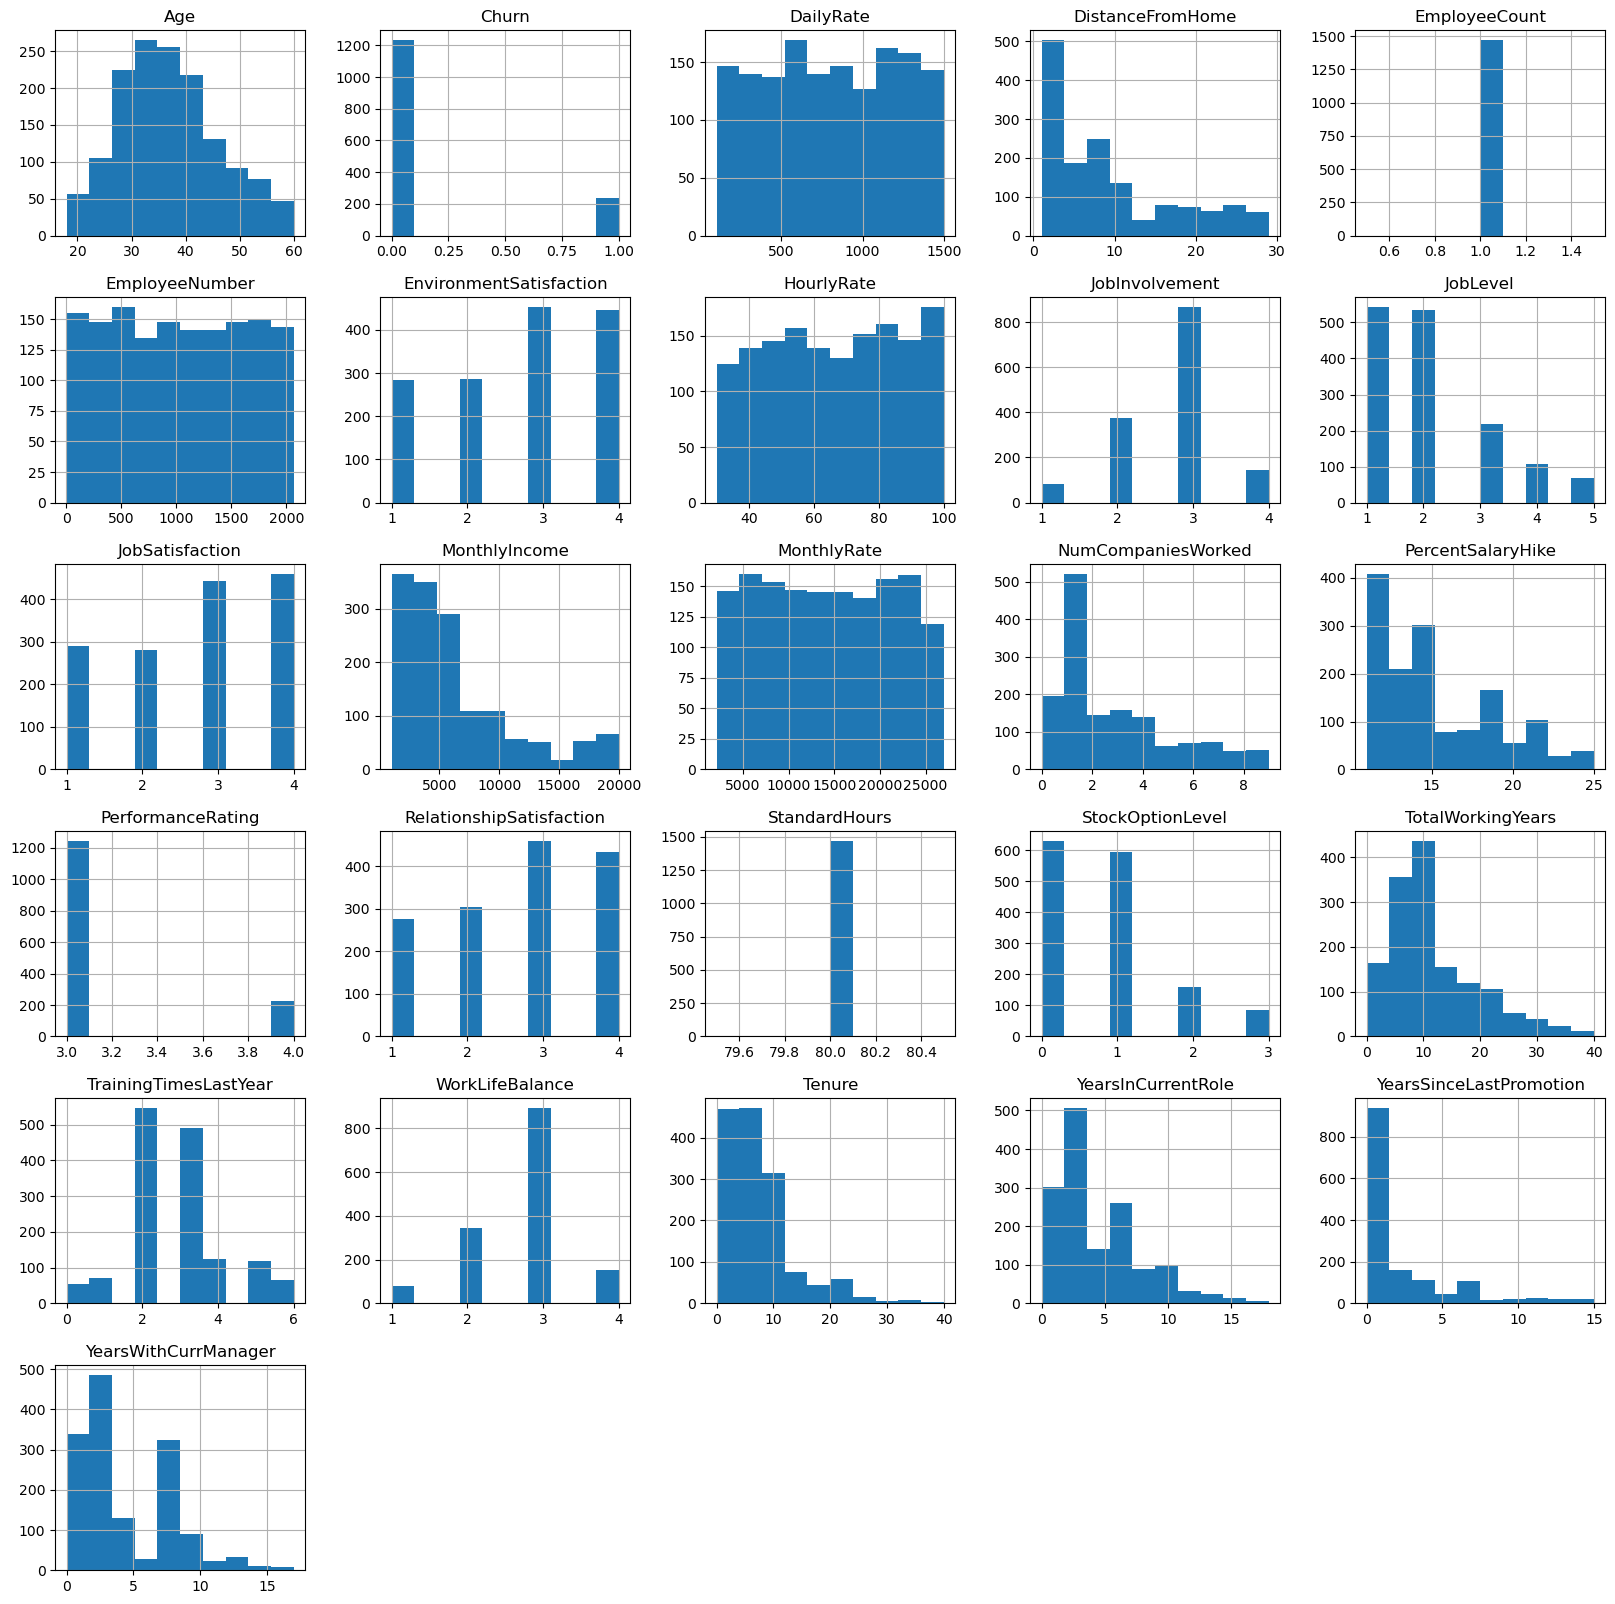

In [190]:
HR_df.hist(figsize=(20,20))
plt.show()

In [14]:
HR_df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1132,40,No,Travel_Rarely,118,Sales,14,2,Life Sciences,1,1598,...,3,80,1,5,2,3,5,4,1,2
721,50,No,Travel_Rarely,939,Research & Development,24,3,Life Sciences,1,1005,...,4,80,1,22,2,3,12,11,1,5
1429,39,No,Travel_Rarely,116,Research & Development,24,1,Life Sciences,1,2014,...,1,80,0,18,2,3,7,7,1,7
1022,37,No,Non-Travel,1413,Research & Development,5,2,Technical Degree,1,1440,...,1,80,0,7,2,1,6,5,1,3
298,36,No,Travel_Frequently,566,Research & Development,18,4,Life Sciences,1,407,...,4,80,2,4,2,3,1,0,0,0


# Acquire Summary
* Data acquired from file path via (https://ieee-dataport.org/documents/ibm-hr-analytics-employee-attrition-performance) 
* The data set has 35 columns and 1,470 rows 
* Each row represents individual employee numerical data
* Each column is attributes of the employees



In [15]:
# HR_df=HR_df.set_index('Date').sort_index()
# HR_df.head()

# PREPARE

In [16]:
def prep_HR_churn_data(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Drop duplicates
    df.drop_duplicates(inplace=True)

    # Handle missing values (if any)
    # Example: df.fillna(0, inplace=True)

    # Encode categorical variables (if any)
    # Example: label_encoder = LabelEncoder()
    #          df['category_column'] = label_encoder.fit_transform(df['category_column'])

    # Rename attributes
    df.rename(columns={'YearsAtCompany': 'Tenure',
                       'Attrition': 'Churn'}, inplace=True)

    # Convert 'Churn' column to boolean (1 for Yes and 0 for No)
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

    # Define the mapping of numerical values to corresponding labels for education
    education_mapping = {1: 'High School', 2: 'Some College', 3: "Bachelor's Degree", 4: "Master's Degree", 5: 'Doctorate Degree'}

    # Map the numerical values to their corresponding labels for education
    df['Education'] = df['Education'].map(education_mapping)

    return df

**Converted variable education and target  into numerical representations**


In [19]:
# Inspect prepared data
# Make sure to assign the returned DataFrame to the original DataFrame 'df'
HR_df = prep_HR_churn_data(file_path)
HR_df.head()


,Age,Churn,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,Tenure,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,Some College,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,High School,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,Some College,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Master's Degree,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,High School,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
def split_data(df):
    # Split the data into features (X) and target (y)
    X = df.drop('Churn', axis=1)
    y = df['Churn']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

if __name__ == '__main__':
    # Replace 'path/to/your/Data_Hr_Analytics_S3.csv' with the actual full file path to your dataset file
    file_path = '/Users/miattas/codeup-data-science/Employee-Churn-Prediction/Data_Hr_Analytics_S3.csv'

    # Prepare the data
    df = prep_HR_churn_data(file_path)

    # Split the data
    X_train, X_test, y_train, y_test = split_data(df)

In [20]:
HR_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Churn                     1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

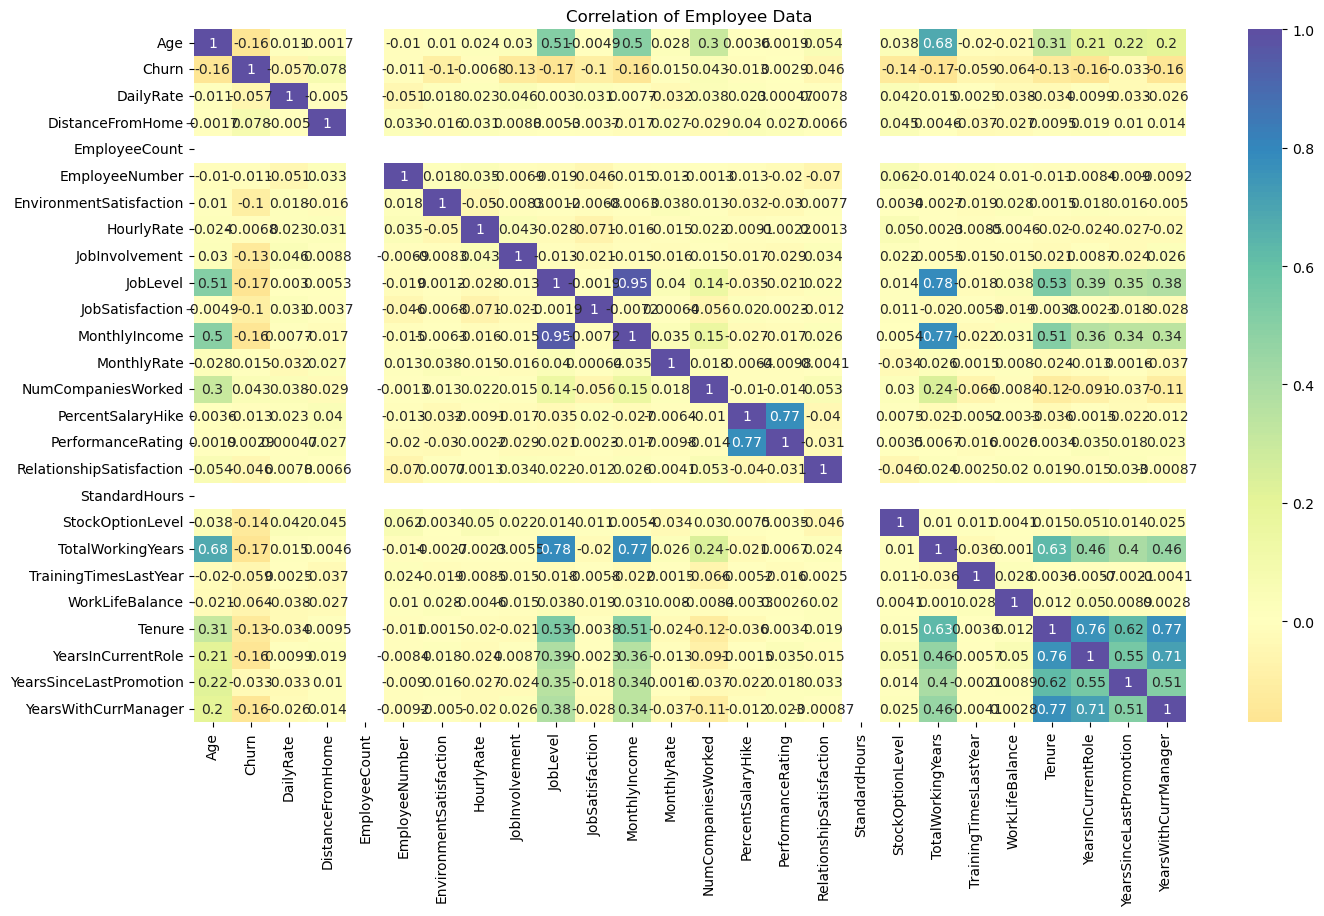

In [ ]:
# import warnings
# warnings.filterwarnings('ignore', category=FutureWarning)

# # Heatmap visual to show data correlation 
# plt.figure(figsize=(16,9))

# sns.heatmap(HR_df.corr(), cmap='Spectral', center=0, annot=True)

# plt.title('Correlation of Employee Data')

# plt.show()




## Features moving fowarad will be Age, Education , and Tenure against Churn

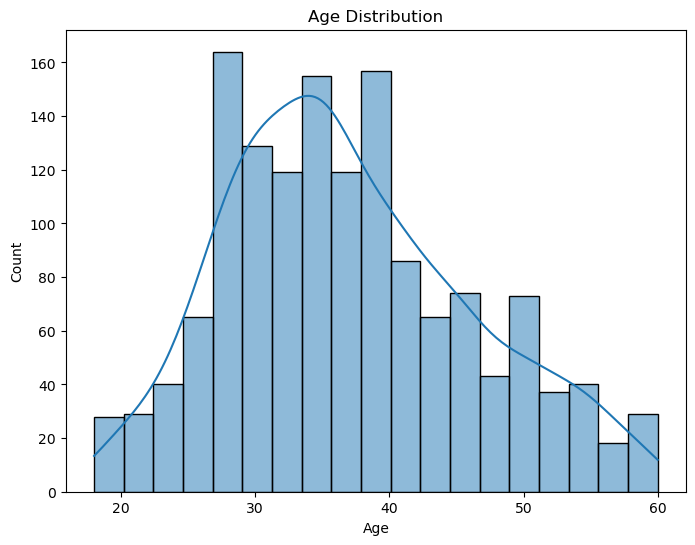

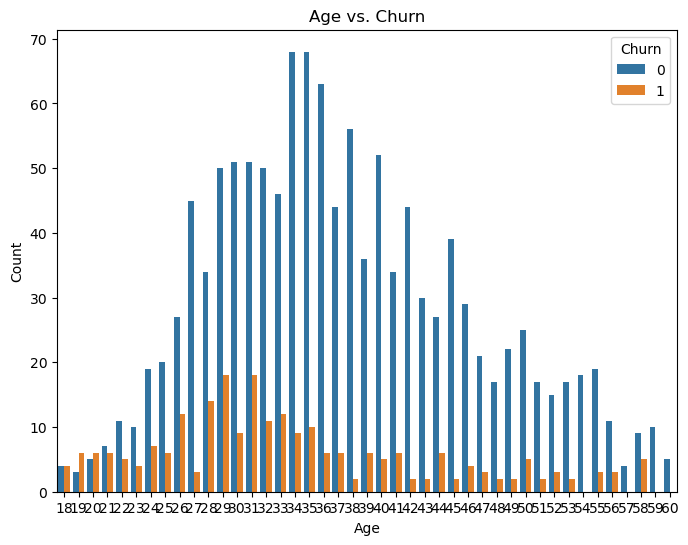

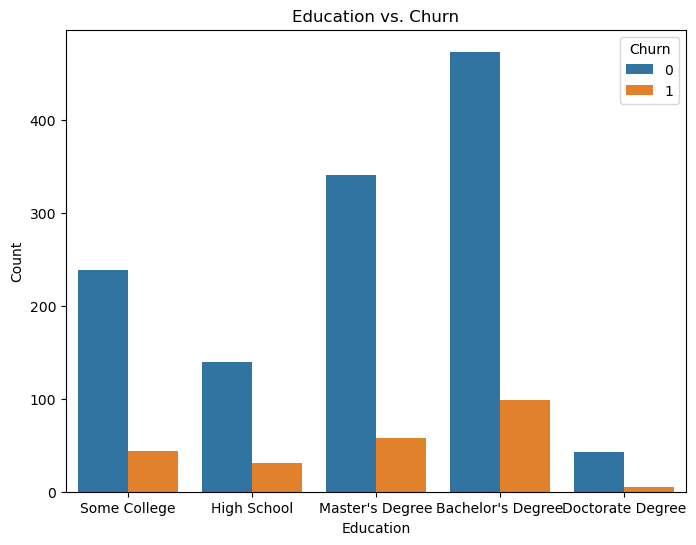

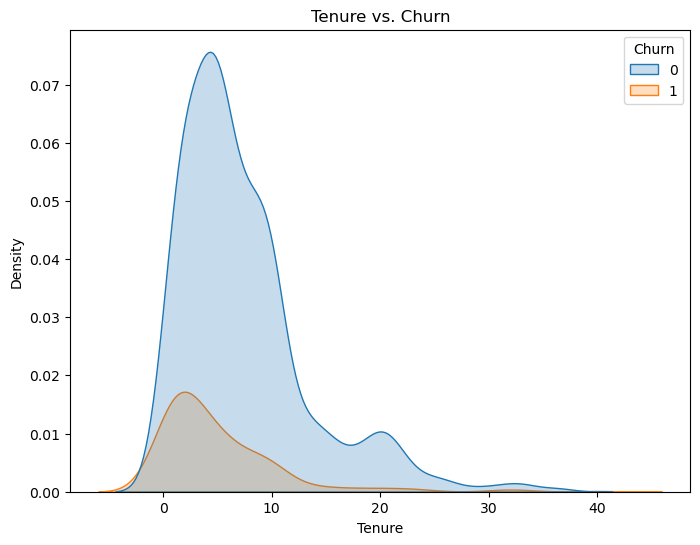

In [108]:
# Load the new CSV file with selected features
new_csv_name = 'Selected_HR_Features.csv'
selected_df = pd.read_csv(new_csv_name)

# Display the first few rows of the selected DataFrame
selected_df.head()

# Visualize the data
# Example: Histogram of 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(selected_df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


# Example: Bar plot of 'Age' vs. 'Churn'
plt.figure(figsize=(8, 6))
sns.countplot(data=selected_df, x='Age', hue='Churn')
plt.title('Age vs. Churn')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


# Example: Bar plot of 'Education' vs. 'Churn'
plt.figure(figsize=(8, 6))
sns.countplot(data=selected_df, x='Education', hue='Churn')
plt.title('Education vs. Churn')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(8, 6))
sns.kdeplot(data=selected_df, x='Tenure', hue='Churn', fill=True)
plt.title('Tenure vs. Churn')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.show()




In [107]:
from prepare import prep_HR_churn_data, split_data, select_features, save_selected_features_to_csv

# Replace 'Data_Hr_Analytics_S3.csv' with the actual CSV name in the same directory as your Jupyter Notebook
csv_name = 'Data_Hr_Analytics_S3.csv'

# Prepare the data and split it
file_path = f'/Users/miattas/codeup-data-science/Employee-Churn-Prediction/{csv_name}'
df = prep_HR_churn_data(file_path)
X_train, X_test, y_train, y_test = split_data(df)

# Select features and save to a new CSV file
selected_df = select_features(df)
new_csv_name = 'Selected_HR_Features.csv'
save_selected_features_to_csv(new_csv_name, selected_df)


In [116]:
selected_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        6 non-null      int64
 1   Education  6 non-null      int64
 2   Tenure     6 non-null      int64
 3   Churn      6 non-null      int64
dtypes: int64(4)
memory usage: 320.0 bytes


In [103]:
selected_df.describe()

,Age,Tenure,Churn
count,1470.000000,1470.000000,1470.000000
mean,36.923810,7.008163,0.161224
std,9.135373,6.126525,0.367863
min,18.000000,0.000000,0.000000
25%,30.000000,3.000000,0.000000
50%,36.000000,5.000000,0.000000
75%,43.000000,9.000000,0.000000
max,60.000000,40.000000,1.000000


In [109]:
selected_df.shape

(1470, 4)

# DATA TYPE SUMMARY
- 26 integer data types originally now 3
- 9 object data type originally now 1
- 0 null values
- no missing values



In [129]:
# # Create a sample DataFrame (assuming you have a DataFrame named 'your_dataframe')
# selected_df= pd.DataFrame({
#     'Age': [25, 30, 35, 40, 45, 50],
#     'Education': [12, 14, 16, 18, 20, 22],
#     'Tenure': [2, 4, 6, 8, 10, 12],
#     'Churn': [0, 0, 0, 1, 1, 1]
# })


In [130]:
# Call the split_data function to get the train-test split
selected_df_train, selected_df_test, selected_df_train, selected_df_test = split_data(selected_df)

# Now you have the training and testing sets for your features and target variables.
# X_train contains the features for training, y_train contains the target for training
# X_test contains the features for testing, and y_test contains the target for testing.


# PREPARE SUMMARY

### Data Cleaning: 
* Drop unnecessary axis
* Rename
* Find nulls
* Drop nulls 
* Check preperation
* The data set has 4 columns and 1,470 rows
* Each row represents individual employee numerical data
* Each column is attributes of the employees

# EXPLORE

In [88]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)



# Prepare the data
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Dummy Classifier
dummy_classifier = DummyClassifier(strategy='most_frequent')  # Use the most frequent class as the prediction
dummy_classifier.fit(X_train, y_train)

# Make predictions using the dummy classifier on the test set
y_pred_dummy = dummy_classifier.predict(X_test)

# Calculate and display accuracy and classification report
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
print("Baseline Dummy Classifier - Accuracy:", accuracy_dummy)

# Set zero_division parameter to 1 to remove the warning
classification_report_dummy = classification_report(y_test, y_pred_dummy, zero_division=1)
print("Baseline Dummy Classifier - Classification Report:")
print(classification_report_dummy)


Baseline Dummy Classifier - Accuracy: 0.8673469387755102
Baseline Dummy Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       1.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.93      0.50      0.46       294
weighted avg       0.88      0.87      0.81       294



# SPLITTING DATA

In [ ]:
# Create train,validate and test datasets

train, test = train_test_split(telco, test_size=.2, random_state=123)
train, validate = train_test_split(train, test_size=.3, random_state=123)

# BASELINE 

In [61]:
 prep_HR_churn_data(file_path).T

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
Age,41,49,37,33,27,32,59,30,38,36,...,29,50,39,31,26,36,39,27,49,34
Churn,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,...,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591,1005,1324,1358,216,1299,...,468,410,722,325,1167,884,613,155,1023,628
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,...,Research & Development,Sales,Sales,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,1,8,2,3,2,2,3,24,23,27,...,28,28,24,5,5,23,6,4,2,8
Education,Some College,High School,Some College,Master's Degree,High School,Some College,Bachelor's Degree,High School,Bachelor's Degree,Bachelor's Degree,...,Master's Degree,Bachelor's Degree,High School,Bachelor's Degree,Bachelor's Degree,Some College,High School,Bachelor's Degree,Bachelor's Degree,Bachelor's Degree
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical,Life Sciences,Medical,Life Sciences,Life Sciences,Medical,...,Medical,Marketing,Marketing,Medical,Other,Medical,Medical,Life Sciences,Medical,Medical
EmployeeCount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EmployeeNumber,1,2,4,5,7,8,10,11,12,13,...,2054,2055,2056,2057,2060,2061,2062,2064,2065,2068


In [ ]:
# Split the data into train, validate, and test sets
train, validate, test = prepare.split_data(df)
print(f'train: {train.shape}')
print(f'validate: {validate.shape}')
print(f'test: {test.shape}')

In [26]:
# Change the name of the data to 'HR'
HR = prep_HR_churn_data(file_path)

In [28]:
# Review the data
HR.head()

,Age,Churn,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,Tenure,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,Some College,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,High School,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,Some College,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Master's Degree,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,High School,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [29]:
#The data types in this dataset are integers and object.
HR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Churn                     1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [30]:
# Summary of the statistical properties of HR dataset
HR.describe()

,Age,Churn,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,Tenure,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Further exploretion for valuable insights.

In [155]:
# Call value counts of 'Churn' column
HR['Churn'].value_counts()



# % () of employes are (out of )

0    1233
1     237
Name: Churn, dtype: int64

In [162]:
# Call value counts of 'Age column
age_value_counts = HR['Age'].value_counts().sort_index(ascending=True)
age_value_counts



# # 16.21% (1 in 6) of employes are  (1142 out of 7043)

18     8
19     9
20    11
21    13
22    16
23    14
24    26
25    26
26    39
27    48
28    48
29    68
30    60
31    69
32    61
33    58
34    77
35    78
36    69
37    50
38    58
39    42
40    57
41    40
42    46
43    32
44    33
45    41
46    33
47    24
48    19
49    24
50    30
51    19
52    18
53    19
54    18
55    22
56    14
57     4
58    14
59    10
60     5
Name: Age, dtype: int64

In [165]:
# Call value counts of 'Tenure/ column
tenure_value_counts = HR['Tenure'].value_counts().sort_index(ascending=True)

tenure_value_counts



0      44
1     171
2     127
3     128
4     110
5     196
6      76
7      90
8      80
9      82
10    120
11     32
12     14
13     24
14     18
15     20
16     12
17      9
18     13
19     11
20     27
21     14
22     15
23      2
24      6
25      4
26      4
27      2
29      2
30      1
31      3
32      3
33      5
34      1
36      2
37      1
40      1
Name: Tenure, dtype: int64

In [41]:
# Call value counts of 'Age column
education_value_counts = HR['Education'].value_counts()

print(education_value_counts)


Bachelor's Degree    572
Master's Degree      398
Some College         282
High School          170
Doctorate Degree      48
Name: Education, dtype: int64


In [42]:
# Average Churn max Churn, Churn Age
HR.Churn.mean(), HR.Churn.max(), HR.Churn.min()

(0.16122448979591836, 1, 0)

In [43]:
# Average Age max Age, min Age
HR.Age.mean(), HR.Age.max(), HR.Age.min()

(36.923809523809524, 60, 18)

In [45]:
# Average Tenure, max Tenure, min Tenure
HR.Tenure.mean(), HR.Tenure.max(), HR.Tenure.min()

(7.0081632653061225, 40, 0)

In [178]:
# Average Education max Education, min Education
HR.Education.mean(), HR.Education.max(), HR.Education.min()

AttributeError: 'DataFrame' object has no attribute 'Education'

In [179]:
# Group by churn and Age
Age_churn= HR.groupby(['Churn','Age'])


In [180]:
# Value counts for churn as int not obj
(HR.Churn == 'Yes').astype(int).value_counts()

0    26
Name: Churn, dtype: int64

In [169]:
HR.head()


,Age,Churn,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,Tenure,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,Some College,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,High School,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,Some College,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Master's Degree,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,High School,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [170]:
HR.head()


,Age,Churn,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,Tenure,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,Some College,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,High School,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,Some College,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Master's Degree,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,High School,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Prep

In [171]:
# Show all column names for next steps of value count loop
HR.columns

Index(['Age', 'Churn', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'Tenure', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [172]:
# List the columns that will be used in the loop.

columns = ['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type_id', 'contract_type',
       'payment_type_id', 'payment_type', 'internet_service_type_id',
       'internet_service_type']

In [173]:
# Create for loop print value counts and percents
for col in columns:
    print(col)
    print(HR[col].value_counts())
    print('----------------------------------------')
    print(HR[col].value_counts(normalize=True))
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

gender


KeyError: 'gender'

In [174]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [175]:
# Identify a  correlation, age appears to correlate with churn the most
HR = HR.corr()
HR
# The highest positive correlation with churn are Age and monthly_charges 


,Age,Churn,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,Tenure,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Churn,-0.159205,1.000000,-0.056652,0.077924,NaN,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [176]:
# Provides correlation with JUST churn
HR = HR.correlation['churn']
HR_corr_churn

# senior_citizen is still the highest correlation
#This data will help us pinpoint why customers churn

AttributeError: 'DataFrame' object has no attribute 'correlation'

In [182]:
# Plot displays Age (1) vs non-senior citizen (0)
# Plot displays churn (1) vs do not churn (0)
sns.countplot(x='churn', hue='Age', data=HR)

ValueError: Could not interpret input 'churn'

In [181]:
# Heatmap viual to show data correlation 
plt.figure(figsize=(16,9))

sns.heatmap(telco.corr(), cmap='YlOrRd', center=0, annot=True)

plt.title('Correlation of HR Data')

plt.show()

NameError: name 'telco' is not defined

<Figure size 1600x900 with 0 Axes>

# STATISTICAL TESTING 

#

In [ ]:
# Create confusion matrix
observed = pd.crosstab(HR.churn, HR.Age)
observed

In [ ]:
# Define alpha
alpha = 0.05

In [ ]:
# chi2 contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

In [ ]:
# Streamline data
print('Observed\n')
print(observed.values)
print('---------------------\nExpected\n')
print(expected.astype(int))
print('---------------------\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
if p< alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

In [ ]:
We reject the null hypothesis

In [ ]:
We reject 

Hypothosis:

**$H_{0}$**: there is no relationship between churn and employee age

**$H_{A}$**: there is a relationshp between churn and employee age

True Positive: Correctly predict there is a relationship and there is a relationship

True Negative: Correctly Predict there is no relationship and there is not relationship

False Positive: Incorectly predict there is a relationship and there is no relationship

False Negative: Incorrectly predict there is no relationship and there is a relationship


In [ ]:
. We believe that there is a relationship between churn and customer age

## Finding the best model
- churn and Age are both categorical
- 2 discrete variables
- use chi2 testing

# TRAIN SPLIT

In [62]:
# Split the data for Age, Education, Tenure, and Churn
X_age_train, X_age_test, y_age_train, y_age_test = split_data(selected_df[['Age', 'Churn']])
X_edu_train, X_edu_test, y_edu_train, y_edu_test = split_data(selected_df[['Education', 'Churn']])
X_tenure_train, X_tenure_test, y_tenure_train, y_tenure_test = split_data(selected_df[['Tenure', 'Churn']])


In [ ]:
import prepare
import acquire

In [ ]:
# Explore and plot with only train set


In [ ]:
# Crosstab, confusion matrix


In [ ]:
pd.crosstab(train.churn, train.model5)


In [ ]:
# make baseline


In [ ]:
X_col= ['senior_citizen','tenure', 'internet_service_type_id', 'contract_type_id']
y_col= 'churn'


In [ ]:
X_train = train[X_col]
y_train= train[y_col]

X_validate = validate[X_col]
y_validate= validate[y_col]

X_test = test[X_col]
y_test= test[y_col]